In [1]:
#import required libraries
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time
%matplotlib inline

In [2]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
#load test iamge
test1 = cv2.imread('baby.jpg')
#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

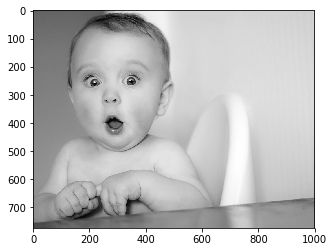

In [4]:
plt.imshow(gray_img, cmap='gray')

In [8]:
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [9]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

In [10]:
#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


In [11]:
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

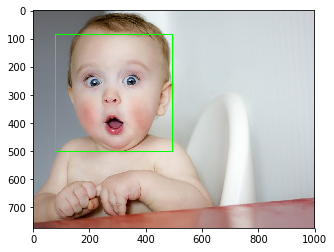

In [12]:
plt.imshow(convertToRGB(test1))

In [13]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5)
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img_copy

In [14]:
test2 = cv2.imread('babies.jpg')

In [15]:
#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

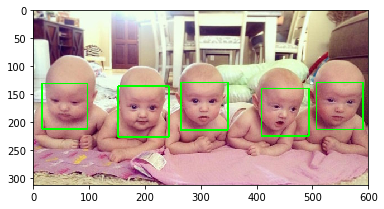

In [16]:
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

In [17]:
#load another image
test2 = cv2.imread('family.jpg')

In [18]:
#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

In [19]:
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img)

SyntaxError: unexpected EOF while parsing (<ipython-input-19-12d7e413da39>, line 2)

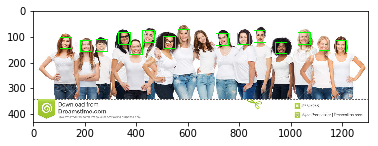

In [20]:
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

# OpenCV code 2 - LBP cascade classifier

In [21]:
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalcatface.xml')  

In [31]:
#load test image
test2 = cv2.imread('baby.jpg')

In [32]:
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

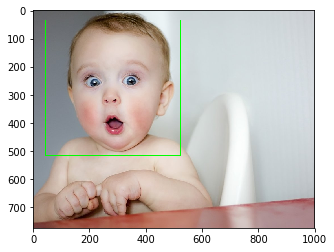

In [33]:
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

# HAAR vs. LBP results analysis

In [51]:
#load test image1
test1 = cv2.imread('group.jpg')

In [35]:
#load test image2
test1 = cv2.imread('group1.jpg')

# Test 1

In [36]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

In [37]:
#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

In [38]:
#note time after detection
t2 = time.time()

In [39]:
#calculate time difference
dt1 = t2 - t1

In [45]:
dt1

36.27788019180298

# Test 1

In [40]:
#------------LBP-----------
#note time before detection
t1 = time.time()

In [41]:
#call our function to detect faces
lbp_detected_img = detect_faces(lbp_face_cascade, test1)

In [42]:
#note time after detection
t2 = time.time()

In [43]:
#calculate time difference
dt2 = t2 - t1

In [44]:
dt2

28.99766182899475

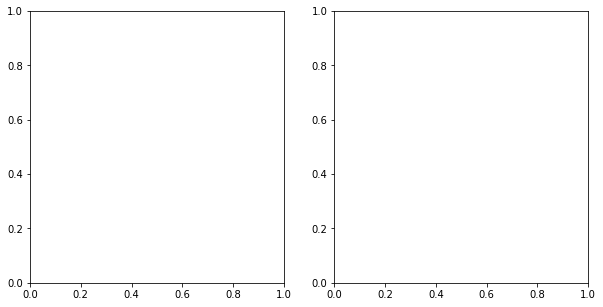

In [46]:
#----------Let's do compare-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

In [48]:
#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

In [49]:
#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))